In [42]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 20.1 MB/s eta 0:00:00


In [1]:
!pip install xgboost
!pip install catboost
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
355417,17,CASH_OUT,146243.29,C348667420,1056.48,0.00,C912252532,2854519.47,3000762.75,0.0,0.0
355418,17,CASH_OUT,156205.32,C409605278,158.00,0.00,C1832841021,537006.83,693212.15,0.0,0.0
355419,17,CASH_OUT,1880.13,C1526906281,156.00,0.00,C285163095,197804.46,199684.59,0.0,0.0
355420,17,CASH_IN,23186.64,C699805358,0.00,23186.64,C241104317,907714.51,884527.86,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355422 entries, 0 to 355421
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            355422 non-null  int64  
 1   type            355422 non-null  object 
 2   amount          355422 non-null  float64
 3   nameOrig        355422 non-null  object 
 4   oldbalanceOrg   355422 non-null  float64
 5   newbalanceOrig  355421 non-null  float64
 6   nameDest        355421 non-null  object 
 7   oldbalanceDest  355421 non-null  float64
 8   newbalanceDest  355421 non-null  float64
 9   isFraud         355421 non-null  float64
 10  isFlaggedFraud  355421 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 29.8+ MB


In [6]:
data.shape

(355422, 11)

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,355422.000000,3.554220e+05,3.554220e+05,3.554210e+05,3.554210e+05,3.554210e+05,355421.000000,355421.0
mean,12.156546,1.744762e+05,8.909430e+05,9.101466e+05,9.840910e+05,1.191188e+06,0.000554,0.0
std,2.947187,2.920235e+05,2.912430e+06,2.949534e+06,2.366426e+06,2.573395e+06,0.023536,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.317487e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,12.000000,8.048926e+04,1.776850e+04,0.000000e+00,9.965770e+04,2.072690e+05,0.000000,0.0
75%,15.000000,2.316858e+05,1.746710e+05,2.154246e+05,8.755708e+05,1.232563e+06,0.000000,0.0
max,17.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.138365e+07,4.148270e+07,1.000000,0.0


In [8]:
missing = data.isnull().sum()
missing

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
for column in data.columns:
  zero_count = (data[column] == 0).sum()
  print(f"Zeros in column '{column}': {zero_count}")

Zeros in column 'step': 0
Zeros in column 'type': 0
Zeros in column 'amount': 0
Zeros in column 'nameOrig': 0
Zeros in column 'oldbalanceOrg': 116615
Zeros in column 'newbalanceOrig': 196002
Zeros in column 'nameDest': 0
Zeros in column 'oldbalanceDest': 147502
Zeros in column 'newbalanceDest': 142074
Zeros in column 'isFraud': 355224
Zeros in column 'isFlaggedFraud': 355421


In [11]:
data = data[data['amount']>0].copy()

In [12]:
unique_values_type = data['type'].unique()
unique_values_isFraud = data['isFraud'].unique()
unique_values_isFlaggedFraud = data['isFlaggedFraud'].unique()

# Display the unique values for each column
print("Unique values in 'type' column:", unique_values_type)
print("Unique values in 'isFraud' column:", unique_values_isFraud)
print("Unique values in 'isFlaggedFraud' column:", unique_values_isFlaggedFraud)

Unique values in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Unique values in 'isFraud' column: [ 0.  1. nan]
Unique values in 'isFlaggedFraud' column: [ 0. nan]


In [13]:
data['type'] = data['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4})

Value Counts:
 isFraud
0.0    355224
1.0       197
Name: count, dtype: int64


<ipython-input-14-6717d4001838>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')


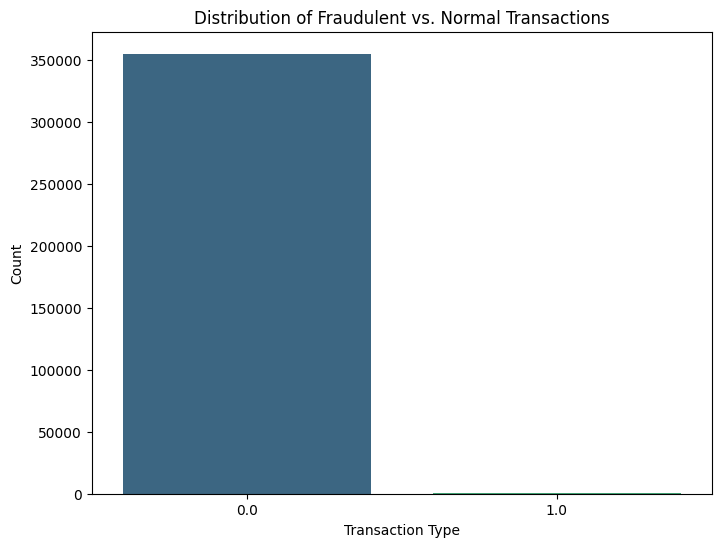

In [14]:
value_counts = data['isFraud'].value_counts()
print("Value Counts:\n", value_counts)

# Plot a count plot to visualize the distribution of fraudulent vs. normal transactions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')
plt.title('Distribution of Fraudulent vs. Normal Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

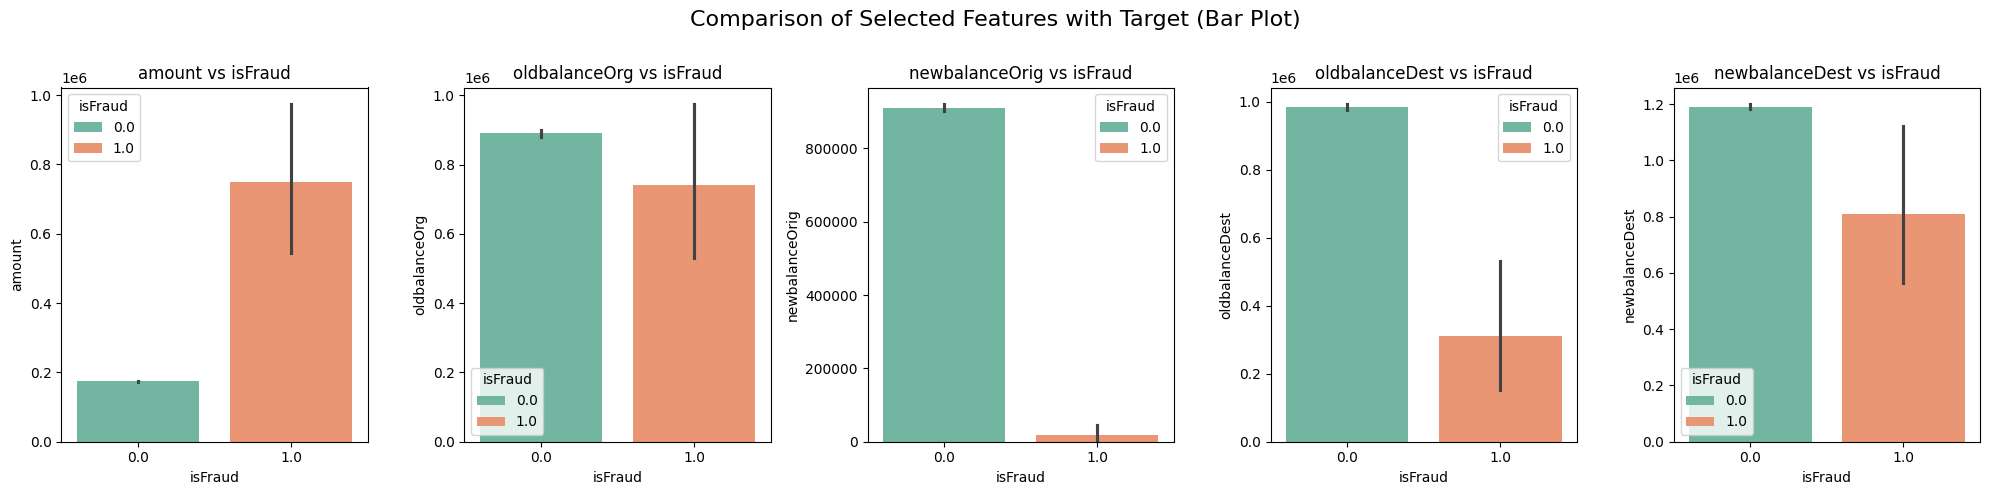

In [15]:
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create subplots (number of subplots is equal to the number of selected features)
fig, axes = plt.subplots(1, len(selected_features), figsize=(20, 5))

# Loop through each selected feature to create individual bar plots
for i, feature in enumerate(selected_features):
    sns.barplot(x=data['isFraud'], y=data[feature], hue=data['isFraud'], ax=axes[i], palette="Set2")
    axes[i].set_title(f'{feature} vs isFraud')  # Title for each subplot
    axes[i].set_xlabel('isFraud')
    axes[i].set_ylabel(feature)

# Add a title for the overall figure and adjust layout for better spacing
plt.suptitle("Comparison of Selected Features with Target (Bar Plot)", fontsize=16)
plt.tight_layout()
plt.show()

Value Counts:
 type
0    126721
1    120696
2     75827
3     29614
4      2564
Name: count, dtype: int64


<ipython-input-16-c77b0b7f9546>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')


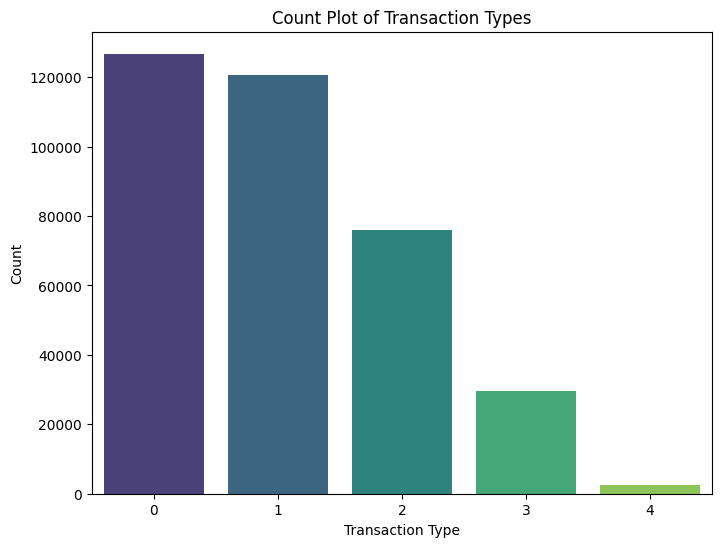

In [16]:
value_counts = data['type'].value_counts()
print("Value Counts:\n", value_counts)

# Plot a count plot to visualize transaction type popularity
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

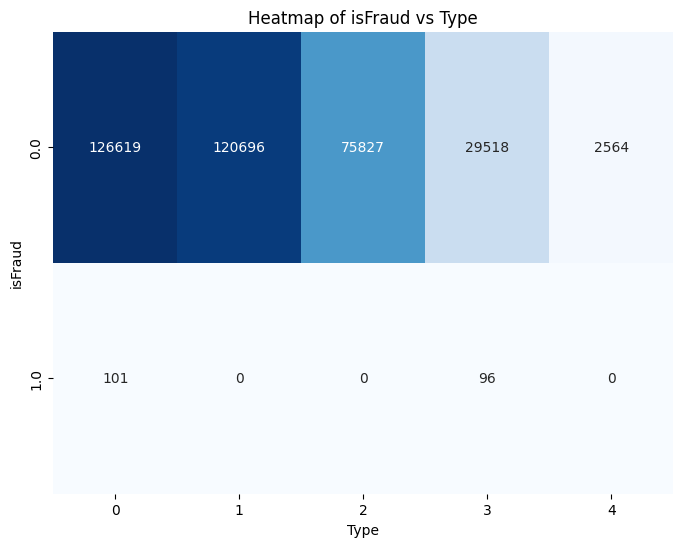

In [17]:
contingency_table = pd.crosstab(data['isFraud'], data['type'])

# Plot heatmap for the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Heatmap of isFraud vs Type')
plt.xlabel('Type')
plt.ylabel('isFraud')
plt.show()

In [18]:
transaction_type_weights = {
    0: 2.0,
    1: 1.0,
    2: 1.0,
    3: 2.0,
    4: 1.0
}
data['transaction_type_weight'] = data['type'].map(lambda x: transaction_type_weights.get(x, 1.0))

In [19]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

#Initializing scalers
robust_scale = RobustScaler()
data['amount_scaled'] = robust_scale.fit_transform(data[['amount']])

#Applying log transformations to prevent zero dominance
data['oldbalanceOrg_log'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig_log'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest_log'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log'] = np.log1p(data['newbalanceDest'])

print(data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log',
                        'oldbalanceDest_log', 'newbalanceDest_log']].describe())

       amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
count  355422.000000      355422.000000       355421.000000   
mean        0.430125           7.614293            5.654119   
std         1.336425           5.773445            6.448131   
min        -0.368352           0.000000            0.000000   
25%        -0.308060           0.000000            0.000000   
50%         0.000000           9.785239            0.000000   
75%         0.691940          12.070665           12.280371   
max        45.395943          17.477518           17.477693   

       oldbalanceDest_log  newbalanceDest_log  
count       355421.000000       355421.000000  
mean             7.718637            8.162985  
std              6.652188            6.764192  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%             11.509507           12.241778  
75%             13.682632           14.024607  
max             17.538396           17.540787  


In [20]:
# Define amount bins and labels
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K+', '1000K+']

# Bin the transaction amounts
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

# Calculate fraud rate per bin (in a separate DataFrame)
fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(
    columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}
)
fraud_rate['Fraud Rate'] = fraud_rate['Fraudulent Transactions'] / fraud_rate['Total Transactions']

# Reset index for readability
fraud_rate = fraud_rate.reset_index()

# Display fraud rate per bin
print("Fraud Rate per Bin:")
print(fraud_rate)

Fraud Rate per Bin:
  amount_bin  Total Transactions  Fraudulent Transactions  Fraud Rate
0      0-100                 754                      0.0    0.000000
1    100-500                3124                     12.0    0.003841
2     500-1K                3902                      0.0    0.000000
3      1K-5K               31196                     10.0    0.000321
4     5K-10K               32968                      4.0    0.000121
5    10K-50K               84161                     57.0    0.000677
6   50K-100K               34963                     17.0    0.000486
7      100K+              156524                     53.0    0.000339
8     1000K+                7829                     44.0    0.005620


<ipython-input-20-ccc959e97cd6>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(


In [21]:
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}

# Assign bin weights to the data DataFrame
data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

<ipython-input-22-cdbc13382d3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount_scaled', data=data, palette='Set2', inner='quartile')


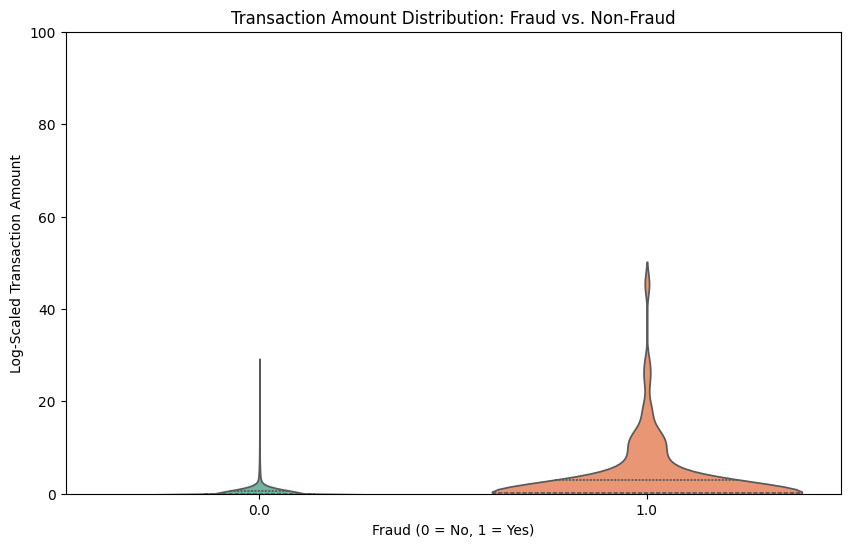

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount_scaled', data=data, palette='Set2', inner='quartile')

plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Log-Scaled Transaction Amount")
plt.ylim(0, 100)
plt.show()

<ipython-input-23-55b61704d99d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')


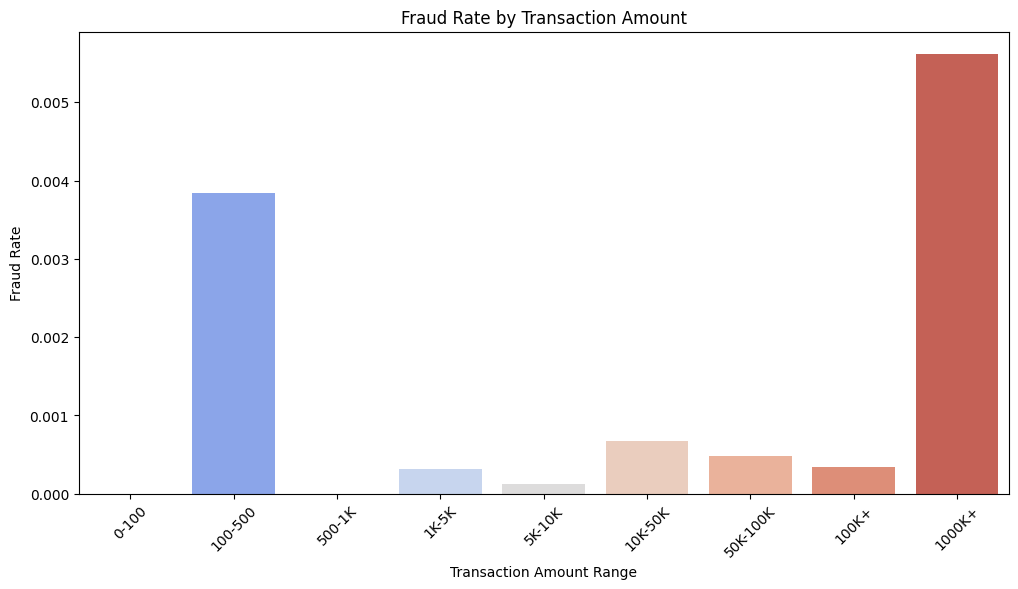

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')

plt.title('Fraud Rate by Transaction Amount')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

In [24]:
data.head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_type_weight,amount_scaled,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log,amount_bin,bin_weight
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0,1.0,-0.323323,12.044359,11.984786,0.000000,0.000000,5K-10K,1.0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0,1.0,-0.359822,9.964112,9.872292,0.000000,0.000000,1K-5K,1.0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0,2.0,-0.367525,5.204007,0.000000,0.000000,0.000000,100-500,1.0
3,1,0,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0,2.0,-0.367525,5.204007,0.000000,9.960954,0.000000,100-500,1.0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0,1.0,-0.314955,10.634773,10.305174,0.000000,0.000000,10K-50K,1.0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0,1.0,-0.332576,10.894162,10.737337,0.000000,0.000000,5K-10K,1.0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0,1.0,-0.335825,12.118312,12.078740,0.000000,0.000000,5K-10K,1.0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0,1.0,-0.332375,12.078740,12.033067,0.000000,0.000000,5K-10K,1.0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0,1.0,-0.349936,7.890583,0.000000,0.000000,0.000000,1K-5K,1.0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0,1.0,-0.343926,10.638760,10.501863,10.643017,10.605341,5K-10K,1.0


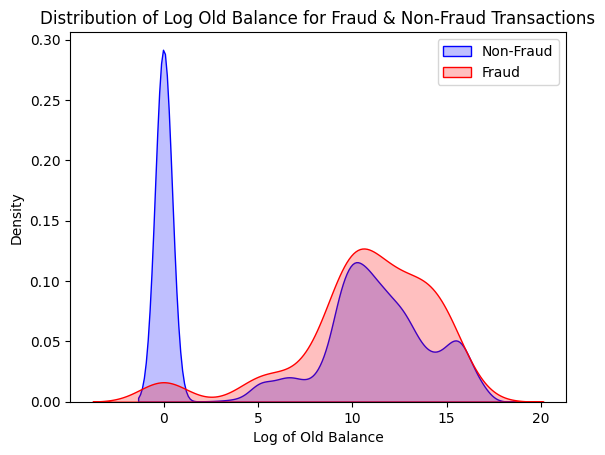

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='oldbalanceOrg_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='oldbalanceOrg_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of Old Balance")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

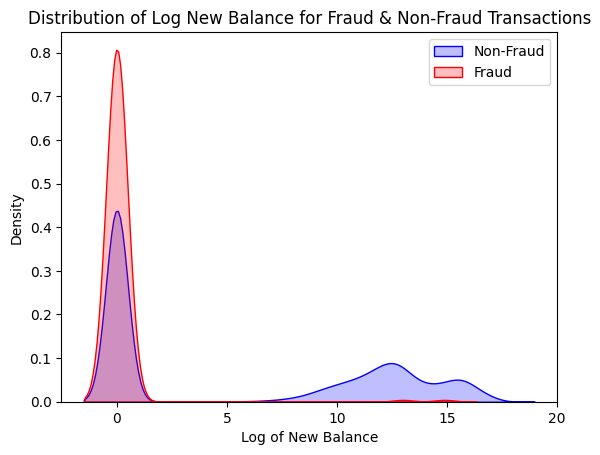

In [26]:
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='newbalanceOrig_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='newbalanceOrig_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of New Balance")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

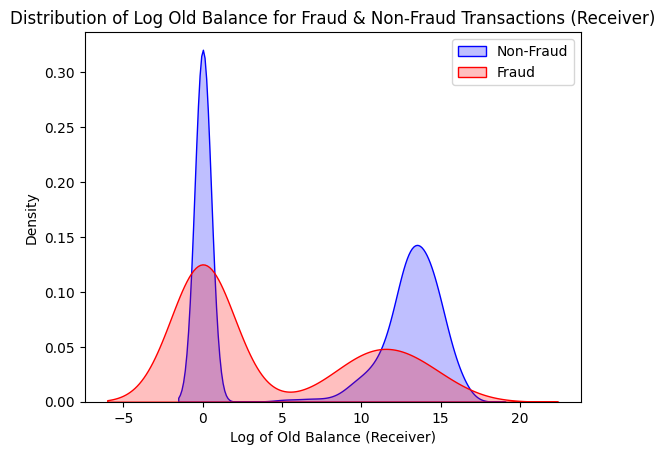

In [27]:
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='oldbalanceDest_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='oldbalanceDest_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of Old Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

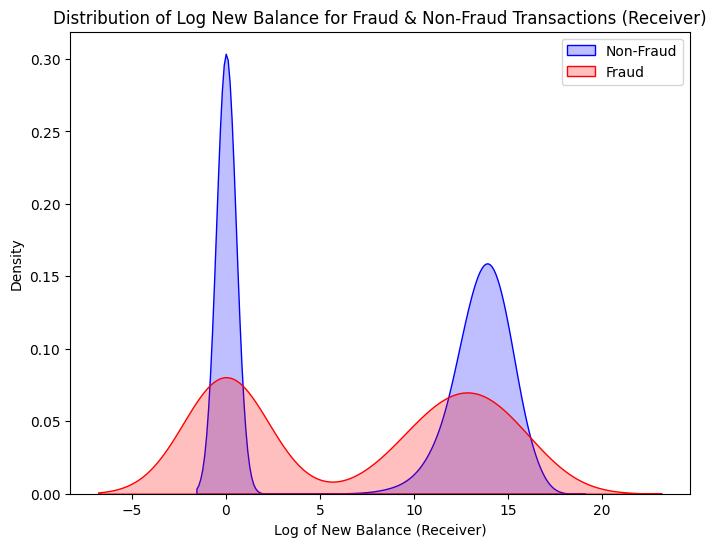

In [28]:
plt.figure(figsize = (8,6))
sns.kdeplot(data=data[data['isFraud'] == 0],
            x='newbalanceDest_log', label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(data=data[data['isFraud'] == 1],
            x='newbalanceDest_log', label='Fraud', fill=True, color='red')
plt.xlabel("Log of New Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

In [29]:
data['combined_weight'] = data['transaction_type_weight'] * data['bin_weight']

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']] = imputer.fit_transform(data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']])

In [31]:
data['balance_diff_Org'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_Dest']= data['oldbalanceDest'] - data['newbalanceDest']

In [32]:
data['balance_diff_Org_log'] = np.log1p(data['balance_diff_Org'])  # Log(x+1) for non-negative values
data['balance_diff_Dest_log'] = np.log1p(data['balance_diff_Dest'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
columns_to_scale = [
    'balance_diff_Org_log',
    'balance_diff_Dest_log',
    'balance_diff_Org'
]
columns_to_scale = [col for col in columns_to_scale if col in data.columns]

scaler = RobustScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print("Scaling complete. First few rows of scaled data:")
print(data.head())

Scaling complete. First few rows of scaled data:
   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     1   9839.64  C1231006815       170136.0       160296.36   
1     1     1   1864.28  C1666544295        21249.0        19384.72   
2     1     3    181.00  C1305486145          181.0            0.00   
3     1     0    181.00   C840083671          181.0            0.00   
4     1     1  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  ...  \
0  M1979787155             0.0             0.0      0.0  ...   
1  M2044282225             0.0             0.0      0.0  ...   
2   C553264065             0.0             0.0      1.0  ...   
3    C38997010         21182.0             0.0      1.0  ...   
4  M1230701703             0.0             0.0      0.0  ...   

   newbalanceOrig_log  oldbalanceDest_log  newbalanceDest_log  amount_bin  \
0           11.984786            0.000000                 0.0 

In [34]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'transaction_type_weight', 'amount_scaled',
       'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log',
       'newbalanceDest_log', 'amount_bin', 'bin_weight', 'combined_weight',
       'balance_diff_Org', 'balance_diff_Dest', 'balance_diff_Org_log',
       'balance_diff_Dest_log'],
      dtype='object')

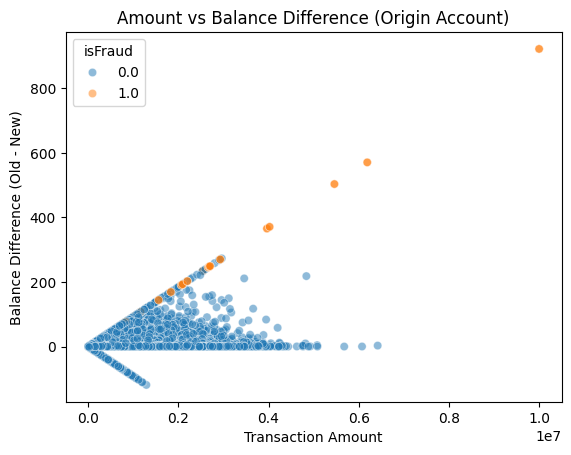

In [35]:
sns.scatterplot(x='amount', y='balance_diff_Org', hue='isFraud', data=data, alpha=0.5)
plt.title('Amount vs Balance Difference (Origin Account)')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.show()

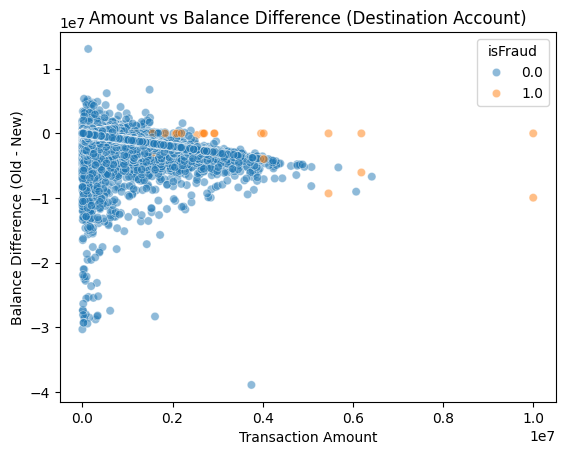

In [36]:
sns.scatterplot(x='amount', y='balance_diff_Dest', hue='isFraud', data=data, alpha=0.5)

plt.title('Amount vs Balance Difference (Destination Account)')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.show()

In [37]:
columns_to_drop = ['step','amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFlaggedFraud','transaction_type_weight','bin_weight','amount_bin',"nameOrig","nameDest" ]
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
0     1      0.0      -0.323323          12.044359           11.984786   
1     1      0.0      -0.359822           9.964112            9.872292   
2     3      1.0      -0.367525           5.204007            0.000000   
3     0      1.0      -0.367525           5.204007            0.000000   
4     1      0.0      -0.314955          10.634773           10.305174   

   oldbalanceDest_log  newbalanceDest_log  combined_weight  balance_diff_Org  \
0            0.000000                 0.0              1.0          0.906879   
1            0.000000                 0.0              1.0          0.171823   
2            0.000000                 0.0              2.0          0.016682   
3            9.960954                 0.0              2.0          0.016682   
4            0.000000                 0.0              1.0          1.075405   

   balance_diff_Dest  balance_diff_Org_log  balance_diff_Dest_log  
0     

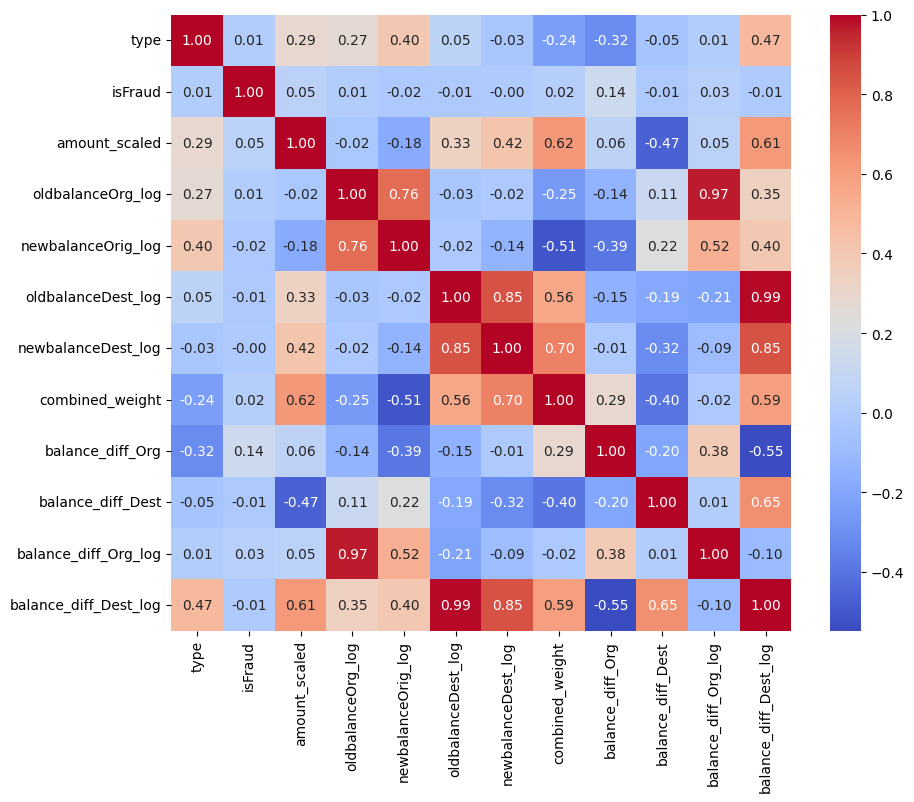

In [38]:
corr = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [39]:
columns_to_drop = [ 'balance_diff_Dest','balance_diff_Dest_log','balance_diff_Org_log','newbalanceDest_log']
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
0     1      0.0      -0.323323          12.044359           11.984786   
1     1      0.0      -0.359822           9.964112            9.872292   
2     3      1.0      -0.367525           5.204007            0.000000   
3     0      1.0      -0.367525           5.204007            0.000000   
4     1      0.0      -0.314955          10.634773           10.305174   

   oldbalanceDest_log  combined_weight  balance_diff_Org  
0            0.000000              1.0          0.906879  
1            0.000000              1.0          0.171823  
2            0.000000              2.0          0.016682  
3            9.960954              2.0          0.016682  
4            0.000000              1.0          1.075405  


In [40]:
data.columns

Index(['type', 'isFraud', 'amount_scaled', 'oldbalanceOrg_log',
       'newbalanceOrig_log', 'oldbalanceDest_log', 'combined_weight',
       'balance_diff_Org'],
      dtype='object')

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Grab the numerical columns we want to check for multicollinearity
X = data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'balance_diff_Org']]
X_vif = X.replace([np.inf, -np.inf], np.nan).dropna()
# Set up a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns  # List the features we're checking
# Recalculate VIF using the cleaned data
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print(vif_data)

              Feature       VIF
0       amount_scaled  1.338516
1   oldbalanceOrg_log  5.827113
2  newbalanceOrig_log  5.689677
3  oldbalanceDest_log  1.853953
4    balance_diff_Org  1.338202


In [46]:
columns_to_drop = ['oldbalanceOrg_log']
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  newbalanceOrig_log  oldbalanceDest_log  \
0     1      0.0      -0.323323           11.984786            0.000000   
1     1      0.0      -0.359822            9.872292            0.000000   
2     3      1.0      -0.367525            0.000000            0.000000   
3     0      1.0      -0.367525            0.000000            9.960954   
4     1      0.0      -0.314955           10.305174            0.000000   

   combined_weight  balance_diff_Org  
0              1.0          0.906879  
1              1.0          0.171823  
2              2.0          0.016682  
3              2.0          0.016682  
4              1.0          1.075405  


In [47]:
data.columns

Index(['type', 'isFraud', 'amount_scaled', 'newbalanceOrig_log',
       'oldbalanceDest_log', 'combined_weight', 'balance_diff_Org'],
      dtype='object')

In [48]:
data

,type,isFraud,amount_scaled,newbalanceOrig_log,oldbalanceDest_log,combined_weight,balance_diff_Org
0,1,0.0,-0.323323,11.984786,0.000000,1.0,0.906879
1,1,0.0,-0.359822,9.872292,0.000000,1.0,0.171823
2,3,1.0,-0.367525,0.000000,0.000000,2.0,0.016682
3,0,1.0,-0.367525,0.000000,9.960954,2.0,0.016682
4,1,0.0,-0.314955,10.305174,0.000000,1.0,1.075405
...,...,...,...,...,...,...,...
355417,0,0.0,0.300919,0.000000,14.864414,3.0,0.097371
355418,0,0.0,0.346509,0.000000,13.193768,3.0,0.014562
355419,0,0.0,-0.359749,0.000000,12.195039,2.0,0.014378
355420,2,0.0,-0.262241,10.051375,13.718686,1.0,-2.137018


In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Data preparation
data = data.dropna(subset=['isFraud'])
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Class balancing
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_under, y_under = rus.fit_resample(X, y)

smote = SMOTE(sampling_strategy=0.5, k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

combined_weight_resampled = np.ones(len(X_resampled))

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_resampled, y_resampled, combined_weight_resampled,
    test_size=0.2, stratify=y_resampled, random_state=42
)

# Models and hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(loss='log_loss', penalty='l1', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0)
}

tuning_params = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'n_estimators': [100, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6], 'subsample': [0.8, 1.0]},
    'CatBoost': {'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1], 'iterations': [200, 500]}
}

# Training loop
for name, model in models.items():
    print(f"\n--- {name} ---")
    try:
        if name in tuning_params:
            search = GridSearchCV(model, tuning_params[name], cv=3, scoring='accuracy', n_jobs=-1)
            search.fit(X_train, y_train, sample_weight=weights_train)
            model = search.best_estimator_
            print(f"Best Params: {search.best_params_}")
        else:
            model.fit(X_train, y_train, sample_weight=weights_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy:  {test_acc:.4f}")

        # Report and Confusion Matrix
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))

    except Exception as e:
        print(f"{name} failed: {e}")



--- Logistic Regression ---
Best Params: {'C': 10}
Train Accuracy: 0.9146
Test Accuracy:  0.9239
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       394
         1.0       0.90      0.87      0.88       197

    accuracy                           0.92       591
   macro avg       0.92      0.91      0.91       591
weighted avg       0.92      0.92      0.92       591

Confusion Matrix:
[[375  19]
 [ 26 171]]

--- SGD Classifier ---
Best Params: {'alpha': 0.0001}
Train Accuracy: 0.8777
Test Accuracy:  0.8866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       394
         1.0       0.83      0.83      0.83       197

    accuracy                           0.89       591
   macro avg       0.87      0.87      0.87       591
weighted avg       0.89      0.89      0.89       591

Confusion Matrix:
[[361  33]
 [ 34 163]]

--- Decision Tree 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:11:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Train Accuracy: 0.9945
Test Accuracy:  0.9729
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       394
         1.0       0.94      0.98      0.96       197

    accuracy                           0.97       591
   macro avg       0.97      0.97      0.97       591
weighted avg       0.97      0.97      0.97       591

Confusion Matrix:
[[382  12]
 [  4 193]]

--- CatBoost ---
Best Params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Train Accuracy: 0.9953
Test Accuracy:  0.9763
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       394
         1.0       0.95      0.98      0.96       197

    accuracy                           0.98       591
   macro avg       0.97      0.98      0.97       591
weighted avg       0.98      0.98      0.98   


--- Logistic Regression ---
Best Params: {'C': 10}
Train Accuracy: 0.9146
Test Accuracy:  0.9239
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       394
         1.0       0.90      0.87      0.88       197

    accuracy                           0.92       591
   macro avg       0.92      0.91      0.91       591
weighted avg       0.92      0.92      0.92       591

Confusion Matrix:
[[375  19]
 [ 26 171]]


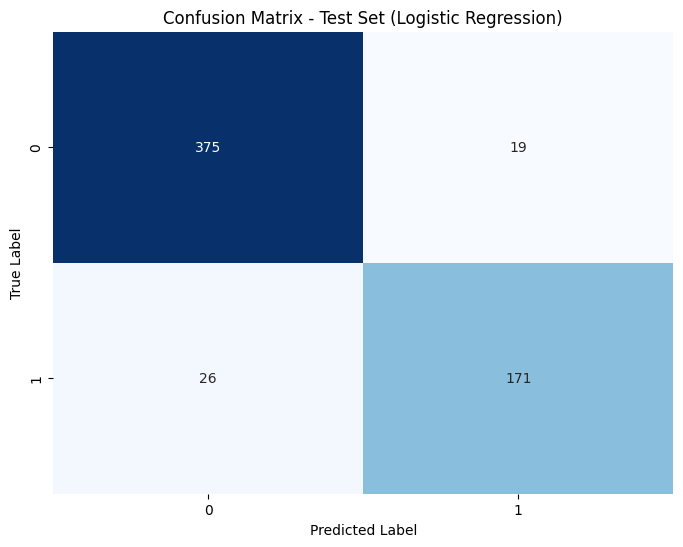

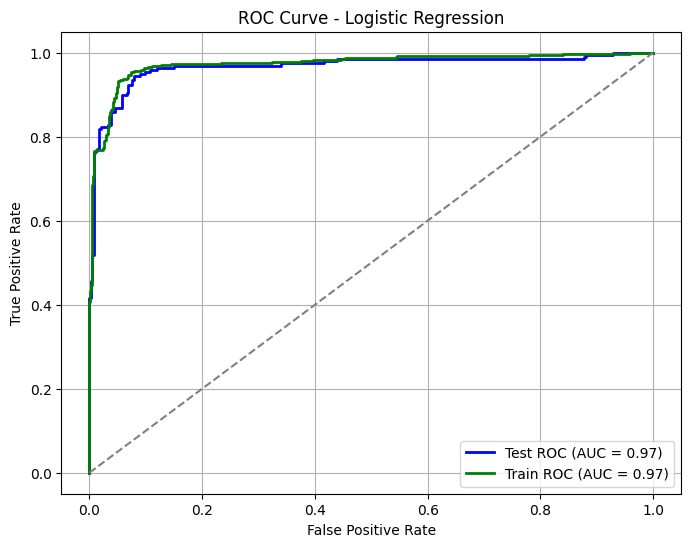

Train AUC Score: 0.9737
Test AUC Score:  0.9673

--- SGD Classifier ---
Best Params: {'alpha': 0.0001}
Train Accuracy: 0.8777
Test Accuracy:  0.8866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       394
         1.0       0.83      0.83      0.83       197

    accuracy                           0.89       591
   macro avg       0.87      0.87      0.87       591
weighted avg       0.89      0.89      0.89       591

Confusion Matrix:
[[361  33]
 [ 34 163]]


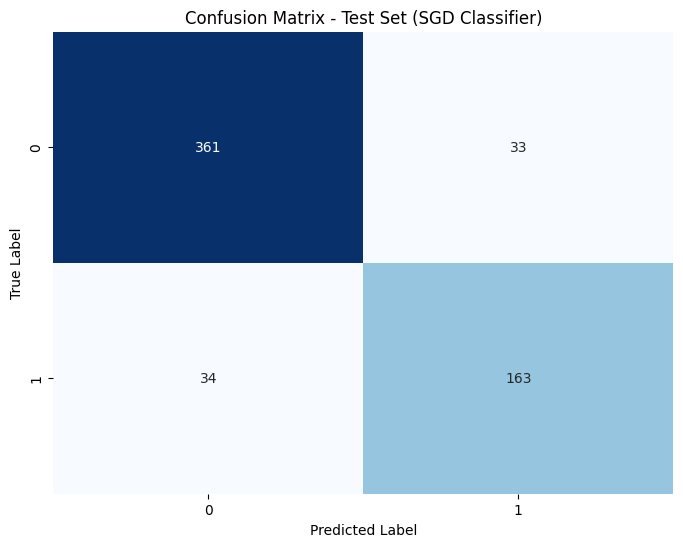

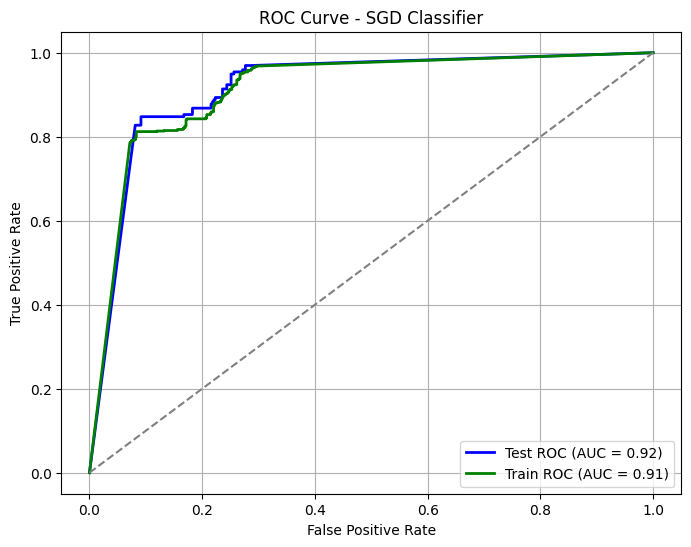

Train AUC Score: 0.9132
Test AUC Score:  0.9166

--- Decision Tree ---
Train Accuracy: 1.0000
Test Accuracy:  0.9780
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       394
         1.0       0.96      0.98      0.97       197

    accuracy                           0.98       591
   macro avg       0.97      0.98      0.98       591
weighted avg       0.98      0.98      0.98       591

Confusion Matrix:
[[385   9]
 [  4 193]]


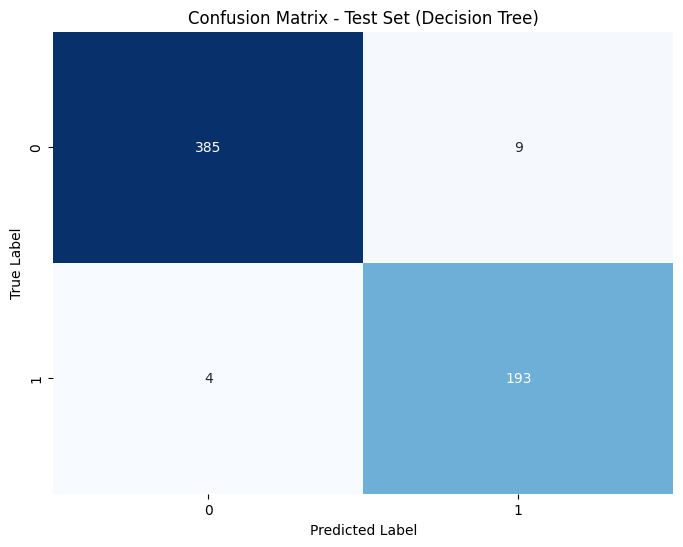

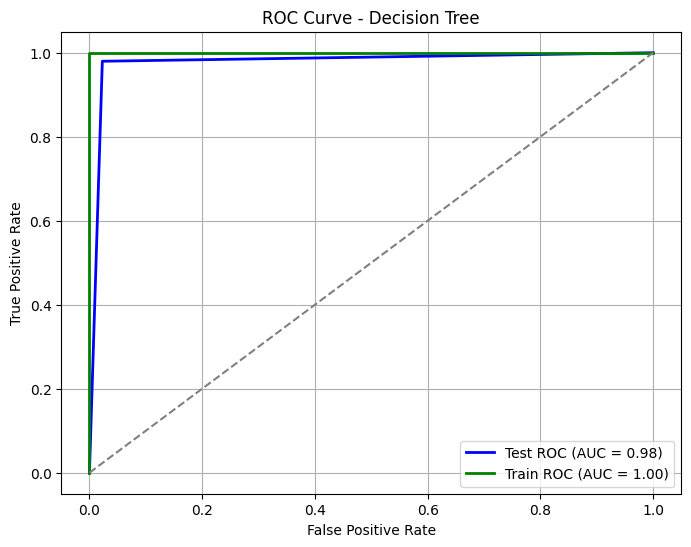

Train AUC Score: 1.0000
Test AUC Score:  0.9784

--- Random Forest ---
Train Accuracy: 1.0000
Test Accuracy:  0.9729
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       394
         1.0       0.95      0.96      0.96       197

    accuracy                           0.97       591
   macro avg       0.97      0.97      0.97       591
weighted avg       0.97      0.97      0.97       591

Confusion Matrix:
[[385   9]
 [  7 190]]


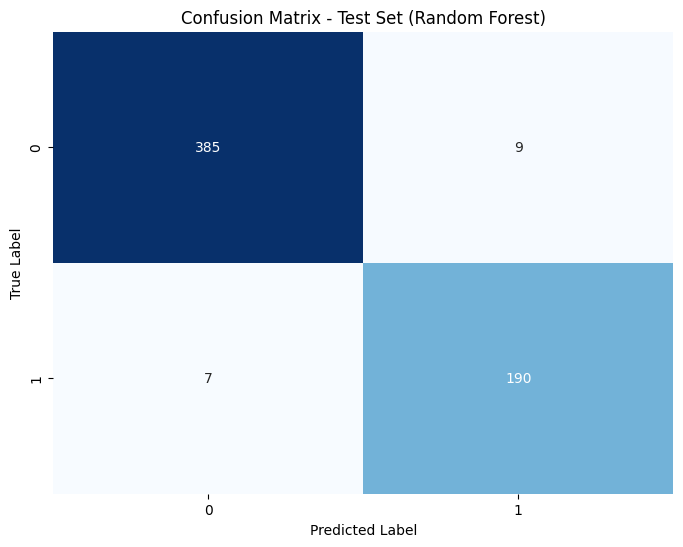

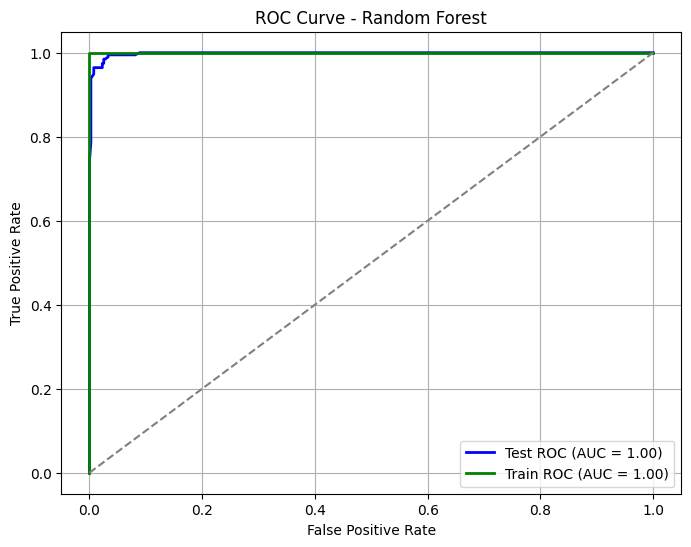

Train AUC Score: 1.0000
Test AUC Score:  0.9981

--- SVM ---
Best Params: {'C': 10, 'kernel': 'linear'}
Train Accuracy: 0.9624
Test Accuracy:  0.9594
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       394
         1.0       0.93      0.95      0.94       197

    accuracy                           0.96       591
   macro avg       0.95      0.96      0.95       591
weighted avg       0.96      0.96      0.96       591

Confusion Matrix:
[[380  14]
 [ 10 187]]


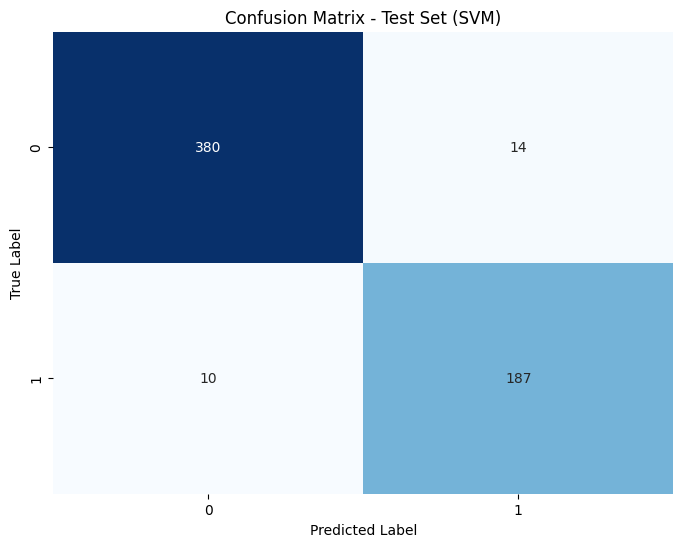

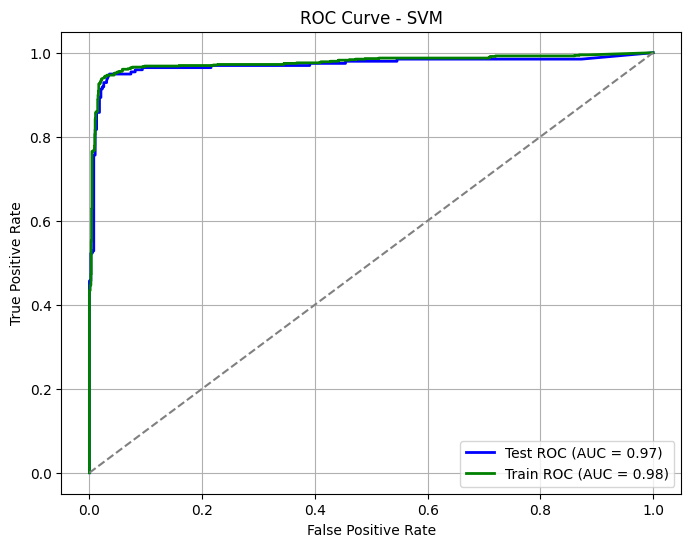

Train AUC Score: 0.9771
Test AUC Score:  0.9712

--- XGBoost ---
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Train Accuracy: 0.9945
Test Accuracy:  0.9729
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       394
         1.0       0.94      0.98      0.96       197

    accuracy                           0.97       591
   macro avg       0.97      0.97      0.97       591
weighted avg       0.97      0.97      0.97       591

Confusion Matrix:
[[382  12]
 [  4 193]]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:15:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


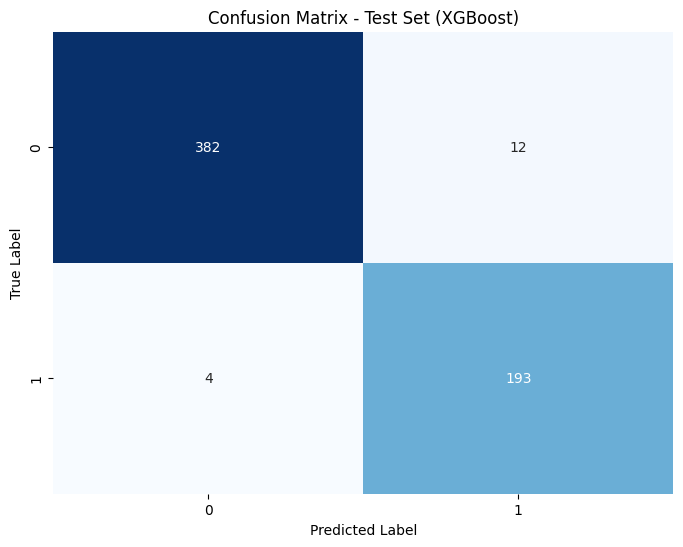

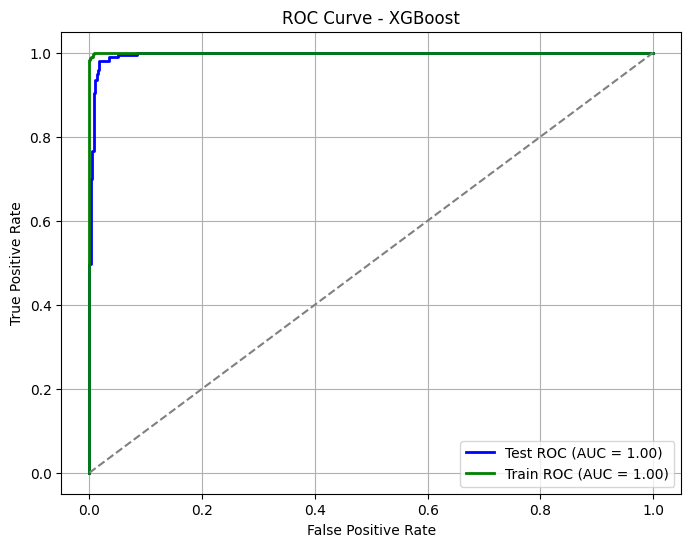

Train AUC Score: 0.9999
Test AUC Score:  0.9960

--- CatBoost ---
Best Params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Train Accuracy: 0.9953
Test Accuracy:  0.9763
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       394
         1.0       0.95      0.98      0.96       197

    accuracy                           0.98       591
   macro avg       0.97      0.98      0.97       591
weighted avg       0.98      0.98      0.98       591

Confusion Matrix:
[[384  10]
 [  4 193]]


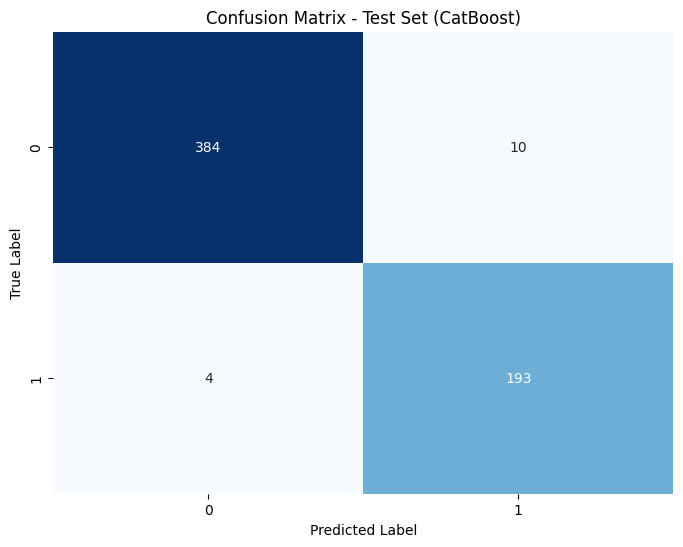

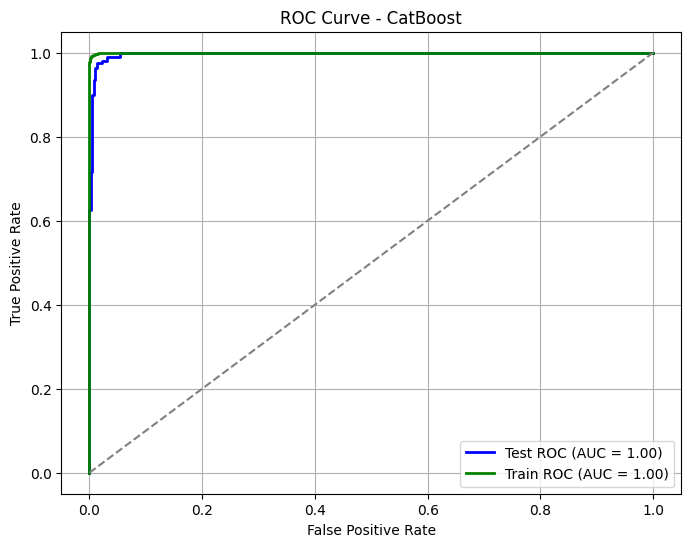

Train AUC Score: 0.9999
Test AUC Score:  0.9972


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report

trained_models = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    try:
        # Hyperparameter tuning if applicable
        if name in tuning_params:
            search = GridSearchCV(model, tuning_params[name], cv=3, scoring='accuracy', n_jobs=-1)
            search.fit(X_train, y_train, sample_weight=weights_train)
            model = search.best_estimator_
            print(f"Best Params: {search.best_params_}")
        else:
            model.fit(X_train, y_train, sample_weight=weights_train)

        trained_models[name] = model  # Save trained model

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy:  {test_acc:.4f}")

        # Classification report & confusion matrix
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - Test Set ({name})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # ROC Curve and AUC if predict_proba available
        if hasattr(model, "predict_proba"):
            y_pred_proba_test = model.predict_proba(X_test)[:, 1]
            y_pred_proba_train = model.predict_proba(X_train)[:, 1]

            fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
            fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)

            auc_test = auc(fpr_test, tpr_test)
            auc_train = auc(fpr_train, tpr_train)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC (AUC = {auc_test:.2f})')
            plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'Train ROC (AUC = {auc_train:.2f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc='lower right')
            plt.grid()
            plt.show()

            print(f"Train AUC Score: {auc_train:.4f}")
            print(f"Test AUC Score:  {auc_test:.4f}")
        else:
            print(f"{name} does not support probability estimates. Skipping ROC curve.")

    except Exception as e:
        print(f"{name} failed: {e}")
